In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\kgo54\AppData\Local\Temp\ipykernel_2452\4122421229.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

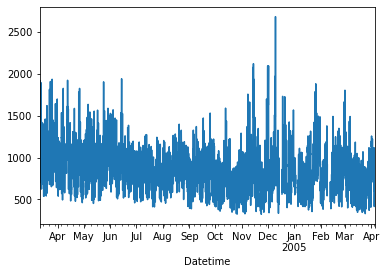

In [2]:
df['PT08.S3(NOx)'].plot()

In [3]:
p = df['PT08.S3(NOx)'].interpolate().copy()

{'whiskers': [<matplotlib.lines.Line2D at 0x2130f810fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2130f8225b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2130f810d00>],
 'medians': [<matplotlib.lines.Line2D at 0x2130f822b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2130f822e20>],
 'means': []}

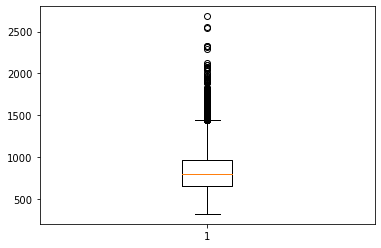

In [4]:
plt.boxplot(p)

In [5]:
"""
IQR-based Outlier Detection
"""

# Q1, Q2(median), Q3
q1 = p.quantile(0.25)
median = p.quantile(0.5)
q3= p.quantile(0.75)
print(q1,median,q3)

654.0 804.0 968.0


In [6]:
# IQR, upper_fence, lower_fence
iqr = q3-q1
uf = q3+1.5*iqr
lf = q1-1.5*iqr
print(iqr,uf,lf)

314.0 1439.0 183.0


In [7]:
outliers = p.loc[(p > uf)|(p <lf)]
print(outliers)

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64


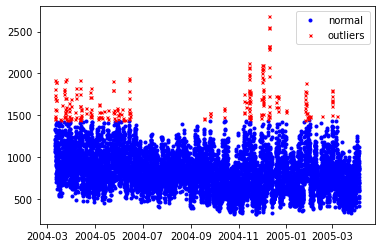

In [8]:
mask = p.index.isin(outliers.index)
plt.plot(p[~mask], label='normal', color='blue',
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

C:\Users\kgo54\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

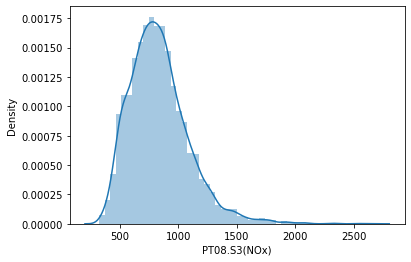

In [9]:
import seaborn as sns

sns.distplot(p)

In [10]:
mean = np.mean(p)

std = np.std(p)

print(mean, std)

832.7588970823982 255.69616900657363


In [13]:
outliers = []
thres = 3

for i in p:
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres):
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562
